In [1]:
from pipelines import preprocessor, preprocessor2

In [2]:
from preprocess import separate, extra_features

In [77]:
data=pd.read_csv("Datasets/train.csv")

<IPython.core.display.Javascript object>

In [78]:
data.shape

(18506, 21)

In [79]:
data=extra_features(data)

In [80]:
data.shape

(18506, 25)

In [93]:
separate(data)

Target Column: ['cost_category']

Numerical Columns: ['total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'first_trip_tz']

Text Columns: ['country', 'purpose', 'main_activity', 'info_source']


In [82]:
data=data.drop(columns=['Tour_ID','package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_mainland','night_zanzibar','trip_length', 'total_male', 'total_female', 'group_size'])
data.shape

(18506, 11)

In [83]:
X=preprocessor2(data)
X.shape

(18506, 171)

In [84]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01621622],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01621622],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.02972973],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.02162162],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04324324],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.05675676]])

In [85]:
y=data['cost_category']
y.shape

(18506,)

In [86]:
le=LabelEncoder()
y=le.fit_transform(y)
y

<IPython.core.display.Javascript object>

array([0, 0, 1, ..., 1, 1, 3])

In [87]:
y.shape

(18506,)

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, shuffle=True)

from sklearn.svm import SVC
cl=SVC(gamma='auto')
cl.fit(X_train, y_train)

SVC(gamma='auto')

In [89]:
y_pred=cl.predict(X_test)

In [90]:
scores= cross_val_score(cl, X_train,y_train, cv=5)
scores.mean()

<IPython.core.display.Javascript object>

0.5302611206895268

In [91]:
from sklearn.metrics import f1_score, classification_report

print("F1_SCORE: ", f1_score(y_pred, y_test, average=None))

F1_SCORE:  [0.412      0.66175115 0.         0.         0.5729952  0.58768267]


In [92]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.38      0.46      0.41       902
           1       0.75      0.59      0.66      1824
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.53      0.62      0.57       673
           5       0.67      0.52      0.59      2153

    accuracy                           0.55      5552
   macro avg       0.39      0.37      0.37      5552
weighted avg       0.63      0.55      0.58      5552



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from xgboost import XGBClassifier

xg=XGBClassifier(n_estimators=50,
                 max_depth= 8,
                 learning_rate=0.01,
                )
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [95]:
y_pred=xg.predict(X_test)

In [96]:
scores=cross_val_score(xg, X_train, y_train, cv=10)
scores.mean()

<IPython.core.display.Javascript object>

0.5512591758425092

In [97]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38       670
           1       0.75      0.61      0.67      1741
           2       0.06      0.14      0.08        43
           3       0.02      0.21      0.04        47
           4       0.62      0.59      0.60       821
           5       0.72      0.54      0.61      2230

    accuracy                           0.56      5552
   macro avg       0.41      0.43      0.40      5552
weighted avg       0.65      0.56      0.59      5552



In [68]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High Cost': 0, 'Higher Cost': 1, 'Highest Cost': 2, 'Low Cost': 3, 'Lower Cost': 4, 'Normal Cost': 5}


In [98]:
len(le.classes_)

6

In [103]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.constraints import MaxNorm 
from tensorflow.keras.optimizers import SGD

n_features=X.shape[1]
num_class=len(le.classes_)

In [117]:
model=Sequential()
model.add(Dense(32, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))

#compile the model
epochs=25
lrate=0.01
decay=lrate/epochs
sgd=SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                5504      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [118]:
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/25
405/405 [==============================] - 13s 17ms/step - loss: 1.3282 - accuracy: 0.4523
Epoch 2/25
405/405 [==============================] - 6s 16ms/step - loss: 1.2314 - accuracy: 0.5073
Epoch 3/25
405/405 [==============================] - 7s 17ms/step - loss: 1.2040 - accuracy: 0.5256
Epoch 4/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1823 - accuracy: 0.5390
Epoch 5/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1804 - accuracy: 0.5408
Epoch 6/25
405/405 [==============================] - 7s 16ms/step - loss: 1.1655 - accuracy: 0.5426
Epoch 7/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1670 - accuracy: 0.5445
Epoch 8/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1538 - accuracy: 0.5497
Epoch 9/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1537 - accuracy: 0.5477
Epoch 10/25
405/405 [==============================] - 7s 17ms/step - loss: 1.1459 - accur

In [124]:
from sklearn.metrics import accuracy_score

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {accuracy}')
print(loss)

174/174 [==============================] - 2s 5ms/step - loss: 1.1356 - accuracy: 0.5623
Test accuracy: 0.5623198747634888
1.1355512142181396


In [14]:
from kfold import skfold

In [125]:
from scipy.stats import chi2_contingency

ct=pd.crosstab(data['cost_category'] ,[data['age_group']])#, data['night_zanzibar']])

chi2, p, dof, expected=chi2_contingency(ct)

print("Chi-squared test results:")
print("  - Chi2 score: ", chi2)
print("  - P-value: ", p)
print("  - Degrees of freedom: ", dof)
print("  - Expected frequencies: ")
expected=pd.DataFrame(expected)
expected.head(5)

<IPython.core.display.Javascript object>

Chi-squared test results:
  - Chi2 score:  1803.196457648891
  - P-value:  0.0
  - Degrees of freedom:  20
  - Expected frequencies: 


<IPython.core.display.Javascript object>

,0,1,2,3,4
0,441.614395,1798.058251,1122.519399,291.560899,24.247055
1,584.136496,2378.345131,1484.789798,385.656274,32.072301
2,43.104831,175.503783,109.566195,28.458500,2.366692
3,188.028315,765.568032,477.940560,124.139306,10.323787
4,308.217551,1254.925376,783.444072,203.490165,16.922836


In [126]:
ct_df=pd.DataFrame(ct)
ct_df

<IPython.core.display.Javascript object>

age_group,18-24,25-44,45-64,65+,<18
cost_category,,,,,
High Cost,460,1797,1143,246,32
Higher Cost,257,1724,2015,836,33
Highest Cost,28,112,163,55,1
Low Cost,201,941,370,47,7
Lower Cost,446,1509,522,65,25
Normal Cost,830,2964,1435,218,24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

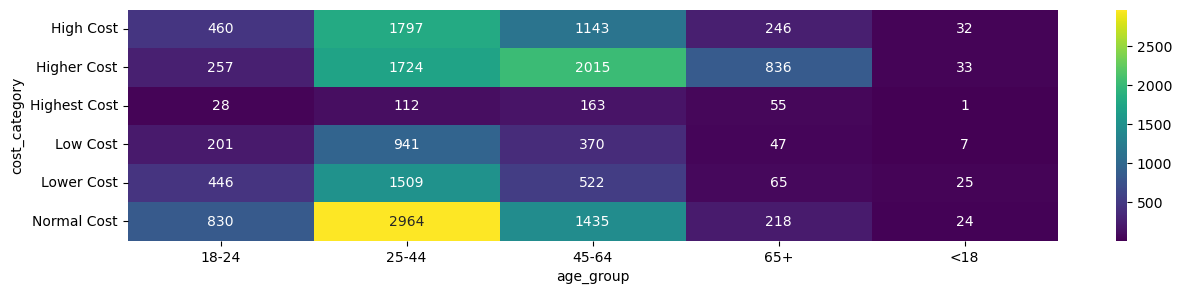

In [127]:
fig, ax=plt.subplots(figsize=(15,3))

sns.heatmap(ct, cmap='viridis', annot=True, fmt='d', ax=ax);

<IPython.core.display.Javascript object>

<AxesSubplot: >

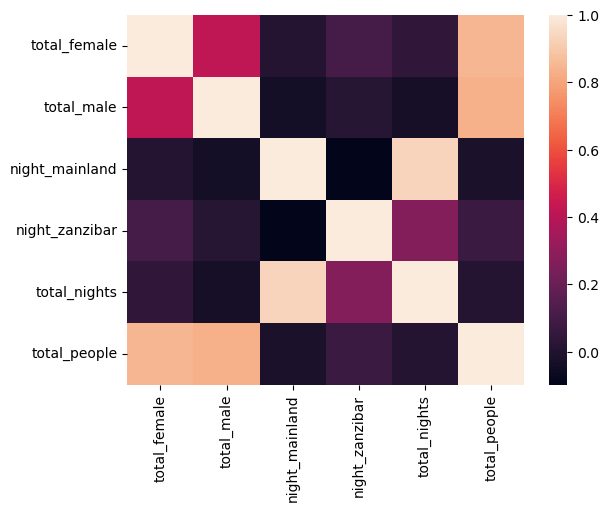

In [76]:
sns.heatmap(data.corr())

In [42]:
data.keys()

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_nights',
       'trip_length', 'total_people', 'group_size'],
      dtype='object')

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pipe1=preprocessor(data)
pipe2=preprocessor2(data)

models={
    "Tree": DecisionTreeClassifier(),
    "Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Lgbm": LGBMClassifier(),
    "NNN": MLPClassifier()
}

vectors={
    "Pipe1": pipe1,
    "Pipe2": pipe2
}


In [21]:
from kfold import skfold
all_models=[]

for class_model in models:
    for sample in vectors:
        all_models.append(skfold(class_model, sample, y, fold))
        print(f"Model: {class_model}_{sample}...\n")

ValueError: Found input variables with inconsistent numbers of samples: [5, 18506]

In [22]:
import numpy as np
from scipy.stats.mstats import winsorize

# Generate some random data with outliers
data = np.random.normal(0, 1, 1000)
data[950:] = 10

# Winsorize the data to handle outliers
data_winsorized = winsorize(data, limits=[0.05, 0.05])

# Print the mean and standard deviation of the original and winsorized data
print("Original mean:", np.mean(data))
print("Original std dev:", np.std(data))
print("Winsorized mean:", np.mean(data_winsorized))
print("Winsorized std dev:", np.std(data_winsorized))

Original mean: 0.5144225155448143
Original std dev: 2.3864299977631607
Winsorized mean: 0.2054066341564273
Winsorized std dev: 1.1684860787749516


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

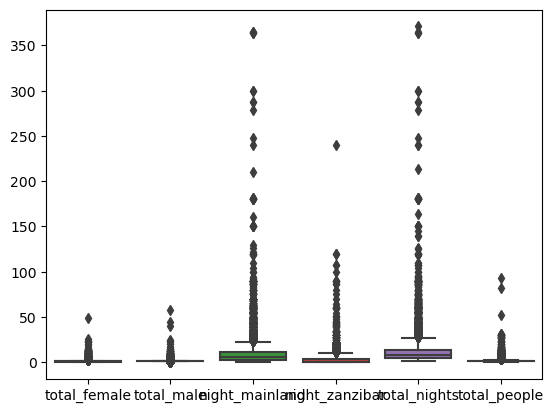

In [61]:
sns.boxplot(data=data)
plt.show();

<IPython.core.display.Javascript object>

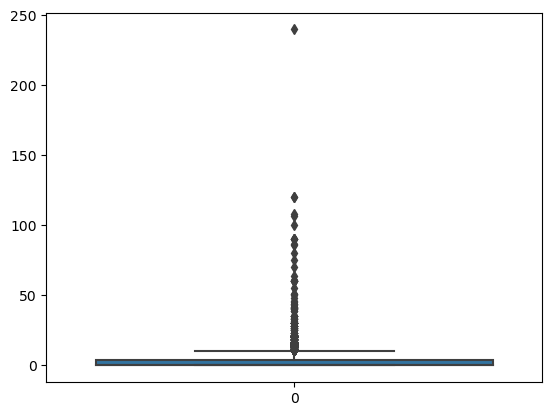

In [59]:
sns.boxplot(data=data['night_zanzibar']);

In [47]:
data_winsorized = winsorize(data, limits=[0.05, 0.05])
sns.boxplot(data_winsorized)
plt.show();

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


AttributeError: 'DataFrame' object has no attribute 'ravel'